In [350]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [351]:
series_df = pd.read_csv("data/PredictingSeriesTests.csv")


In [352]:
series_df.head()

,X,Y1,Y2,Y3,Y4,Y5
0,1,1,2,1,1.0,1
1,2,2,4,4,2.0,3
2,3,3,6,9,3.0,6
3,4,4,8,16,5.0,10
4,5,5,10,25,8.0,15


In [353]:
X=series_df.loc[:, "X"]
X = pd.DataFrame(data=X)

In [354]:
X.shape

(299, 1)

In [355]:
y=series_df.loc[:, "Y4"]
y = pd.DataFrame(data=y)

In [356]:
y.head()

,Y4
0,1.0
1,2.0
2,3.0
3,5.0
4,8.0


In [357]:
# ttsplit = 199
# X_train, X_test = X[0:ttsplit], X[ttsplit:]
# y_train, y_test = y[0:ttsplit], y[ttsplit:]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20)

print(len(X_train), len(y_train), len(X_test), len(y_test))
print(len(X_train), X_train.shape, y_train.shape)

224 224 75 75
224 (224, 1) (224, 1)


In [358]:
y_train.head()

,Y4
289,2.923600e+60
150,2.609970e+31
145,2.353410e+30
140,2.122070e+29
39,1.655801e+08


In [359]:
# Scale the data. This may not be necessary for linear regressions, but will be if I go to some other scheme
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
# Tranform all of the data based on the scaler fit calculated above
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [326]:
# from sklearn.linear_model import Ridge
# model = Ridge(alpha=9, max_iter=100)

# # Fitting our model with all of our features in X
# model.fit(X_train_scaled, y_train_scaled)
# score = model.score(X_train_scaled, y_train_scaled)
# print(f"R2 Score: {score}")

In [327]:
# from sklearn.ensemble import RandomForestRegressor
# model = RandomForestRegressor(random_state=0, n_estimators=400, n_jobs=-1, min_samples_leaf = 5)
# model.fit(X_train,y_train.iloc[:,0])


In [360]:
def build_keras_regressor():
    from keras.models import Sequential
    from keras.layers import Dense
    model = Sequential()
    # Create keras input layer and first hidden layer
    number_inputs = 1
    number_hidden_nodes = 50
    model.add(Dense(units=number_hidden_nodes, activation='relu', input_dim=number_inputs))
    model.add(Dense(units=number_hidden_nodes, activation='relu'))
    model.add(Dense(units=number_hidden_nodes, activation='relu'))
    model.add(Dense(units=number_hidden_nodes, activation='relu'))
    model.add(Dense(units=number_hidden_nodes, activation='relu'))
    # Create keras output layer. There is no activation function since we want values directly
    model.add(Dense(units=1))
    # Compile the model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics = ["mae", "accuracy"])
    print(model.summary())
    return model

In [361]:
from keras.wrappers.scikit_learn import KerasRegressor
model = KerasRegressor(build_fn=build_keras_regressor, batch_size=20,  epochs=1000)
results = model.fit(X_train_scaled, y_train_scaled)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 50)                100       
_________________________________________________________________
dense_38 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_39 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_40 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_41 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 51        
Total params: 10,351
Trainable params: 10,351
Non-trainable params: 0
_________________________________________________________________
None
E

224/224 [==============================] - 0s 98us/step - loss: 0.6750 - mean_absolute_error: 0.1926 - acc: 0.0000e+00
Epoch 54/1000
224/224 [==============================] - 0s 85us/step - loss: 0.8124 - mean_absolute_error: 0.1998 - acc: 0.0000e+00
Epoch 55/1000
224/224 [==============================] - 0s 94us/step - loss: 0.6084 - mean_absolute_error: 0.1724 - acc: 0.0000e+00
Epoch 56/1000
224/224 [==============================] - 0s 85us/step - loss: 0.6385 - mean_absolute_error: 0.1608 - acc: 0.0000e+00
Epoch 57/1000
224/224 [==============================] - 0s 94us/step - loss: 0.6694 - mean_absolute_error: 0.1673 - acc: 0.0000e+00
Epoch 58/1000
224/224 [==============================] - 0s 85us/step - loss: 0.6516 - mean_absolute_error: 0.1872 - acc: 0.0000e+00
Epoch 59/1000
224/224 [==============================] - 0s 89us/step - loss: 0.8987 - mean_absolute_error: 0.2874 - acc: 0.0000e+00
Epoch 60/1000
224/224 [==============================] - 0s 107us/step - loss: 0.58

224/224 [==============================] - 0s 80us/step - loss: 0.6971 - mean_absolute_error: 0.1238 - acc: 0.0000e+00
Epoch 115/1000
224/224 [==============================] - 0s 103us/step - loss: 0.5012 - mean_absolute_error: 0.1696 - acc: 0.0000e+00
Epoch 116/1000
224/224 [==============================] - 0s 94us/step - loss: 0.7340 - mean_absolute_error: 0.1485 - acc: 0.0000e+00
Epoch 117/1000
224/224 [==============================] - 0s 76us/step - loss: 0.5718 - mean_absolute_error: 0.1960 - acc: 0.0000e+00
Epoch 118/1000
224/224 [==============================] - 0s 85us/step - loss: 0.7146 - mean_absolute_error: 0.1407 - acc: 0.0000e+00
Epoch 119/1000
224/224 [==============================] - 0s 89us/step - loss: 0.8038 - mean_absolute_error: 0.2320 - acc: 0.0000e+00
Epoch 120/1000
224/224 [==============================] - 0s 89us/step - loss: 0.8851 - mean_absolute_error: 0.1598 - acc: 0.0000e+00
Epoch 121/1000
224/224 [==============================] - 0s 80us/step - los

224/224 [==============================] - 0s 80us/step - loss: 1.2529 - mean_absolute_error: 0.2960 - acc: 0.0000e+00
Epoch 175/1000
224/224 [==============================] - 0s 85us/step - loss: 0.5351 - mean_absolute_error: 0.1175 - acc: 0.0000e+00
Epoch 176/1000
224/224 [==============================] - 0s 76us/step - loss: 0.6523 - mean_absolute_error: 0.2098 - acc: 0.0000e+00
Epoch 177/1000
224/224 [==============================] - 0s 80us/step - loss: 0.6391 - mean_absolute_error: 0.2020 - acc: 0.0000e+00
Epoch 178/1000
224/224 [==============================] - 0s 80us/step - loss: 0.5227 - mean_absolute_error: 0.1019 - acc: 0.0000e+00
Epoch 179/1000
224/224 [==============================] - 0s 76us/step - loss: 0.3726 - mean_absolute_error: 0.0906 - acc: 0.0000e+00
Epoch 180/1000
224/224 [==============================] - 0s 85us/step - loss: 0.3733 - mean_absolute_error: 0.1023 - acc: 0.0000e+00
Epoch 181/1000
224/224 [==============================] - 0s 76us/step - loss

224/224 [==============================] - 0s 89us/step - loss: 0.2821 - mean_absolute_error: 0.1060 - acc: 0.0000e+00
Epoch 236/1000
224/224 [==============================] - 0s 107us/step - loss: 0.2786 - mean_absolute_error: 0.0981 - acc: 0.0000e+00
Epoch 237/1000
224/224 [==============================] - 0s 103us/step - loss: 0.2077 - mean_absolute_error: 0.0889 - acc: 0.0000e+00
Epoch 238/1000
224/224 [==============================] - 0s 116us/step - loss: 0.3080 - mean_absolute_error: 0.0854 - acc: 0.0000e+00
Epoch 239/1000
224/224 [==============================] - 0s 121us/step - loss: 0.3505 - mean_absolute_error: 0.1249 - acc: 0.0000e+00
Epoch 240/1000
224/224 [==============================] - 0s 116us/step - loss: 0.2639 - mean_absolute_error: 0.0961 - acc: 0.0000e+00
Epoch 241/1000
224/224 [==============================] - 0s 129us/step - loss: 0.2852 - mean_absolute_error: 0.1207 - acc: 0.0000e+00
Epoch 242/1000
224/224 [==============================] - 0s 85us/step 

224/224 [==============================] - 0s 71us/step - loss: 0.2697 - mean_absolute_error: 0.1396 - acc: 0.0000e+00
Epoch 297/1000
224/224 [==============================] - 0s 94us/step - loss: 0.2903 - mean_absolute_error: 0.0839 - acc: 0.0000e+00
Epoch 298/1000
224/224 [==============================] - 0s 98us/step - loss: 2.1474 - mean_absolute_error: 0.4194 - acc: 0.0000e+00
Epoch 299/1000
224/224 [==============================] - 0s 85us/step - loss: 1.1051 - mean_absolute_error: 0.2531 - acc: 0.0000e+00
Epoch 300/1000
224/224 [==============================] - 0s 89us/step - loss: 0.9980 - mean_absolute_error: 0.2269 - acc: 0.0000e+00
Epoch 301/1000
224/224 [==============================] - 0s 80us/step - loss: 0.9689 - mean_absolute_error: 0.1898 - acc: 0.0000e+00
Epoch 302/1000
224/224 [==============================] - 0s 80us/step - loss: 0.9536 - mean_absolute_error: 0.2183 - acc: 0.0000e+00
Epoch 303/1000
224/224 [==============================] - 0s 80us/step - loss

224/224 [==============================] - 0s 80us/step - loss: 0.4716 - mean_absolute_error: 0.1324 - acc: 0.0000e+00
Epoch 358/1000
224/224 [==============================] - 0s 94us/step - loss: 0.4627 - mean_absolute_error: 0.1192 - acc: 0.0000e+00
Epoch 359/1000
224/224 [==============================] - 0s 89us/step - loss: 0.4586 - mean_absolute_error: 0.1257 - acc: 0.0000e+00
Epoch 360/1000
224/224 [==============================] - 0s 80us/step - loss: 0.4405 - mean_absolute_error: 0.1207 - acc: 0.0000e+00
Epoch 361/1000
224/224 [==============================] - 0s 85us/step - loss: 0.4571 - mean_absolute_error: 0.1197 - acc: 0.0000e+00
Epoch 362/1000
224/224 [==============================] - 0s 80us/step - loss: 0.4044 - mean_absolute_error: 0.1088 - acc: 0.0000e+00
Epoch 363/1000
224/224 [==============================] - 0s 80us/step - loss: 0.4452 - mean_absolute_error: 0.1050 - acc: 0.0000e+00
Epoch 364/1000
224/224 [==============================] - 0s 107us/step - los

224/224 [==============================] - 0s 147us/step - loss: 0.2858 - mean_absolute_error: 0.0920 - acc: 0.0000e+00
Epoch 418/1000
224/224 [==============================] - 0s 107us/step - loss: 0.2222 - mean_absolute_error: 0.0675 - acc: 0.0000e+00
Epoch 419/1000
224/224 [==============================] - 0s 116us/step - loss: 1.2961 - mean_absolute_error: 0.3058 - acc: 0.0000e+00
Epoch 420/1000
224/224 [==============================] - 0s 125us/step - loss: 0.6068 - mean_absolute_error: 0.1732 - acc: 0.0000e+00
Epoch 421/1000
224/224 [==============================] - 0s 85us/step - loss: 0.6617 - mean_absolute_error: 0.1068 - acc: 0.0000e+00
Epoch 422/1000
224/224 [==============================] - 0s 89us/step - loss: 0.2879 - mean_absolute_error: 0.0992 - acc: 0.0000e+00
Epoch 423/1000
224/224 [==============================] - 0s 76us/step - loss: 0.2108 - mean_absolute_error: 0.0641 - acc: 0.0000e+00
Epoch 424/1000
224/224 [==============================] - 0s 85us/step - 

224/224 [==============================] - 0s 89us/step - loss: 0.1796 - mean_absolute_error: 0.0972 - acc: 0.0000e+00
Epoch 479/1000
224/224 [==============================] - 0s 94us/step - loss: 0.2093 - mean_absolute_error: 0.0720 - acc: 0.0000e+00
Epoch 480/1000
224/224 [==============================] - 0s 94us/step - loss: 0.2514 - mean_absolute_error: 0.1032 - acc: 0.0000e+00
Epoch 481/1000
224/224 [==============================] - 0s 94us/step - loss: 0.1437 - mean_absolute_error: 0.0508 - acc: 0.0000e+00
Epoch 482/1000
224/224 [==============================] - 0s 103us/step - loss: 0.1320 - mean_absolute_error: 0.0545 - acc: 0.0000e+00
Epoch 483/1000
224/224 [==============================] - 0s 98us/step - loss: 0.1173 - mean_absolute_error: 0.0594 - acc: 0.0000e+00
Epoch 484/1000
224/224 [==============================] - 0s 112us/step - loss: 0.1201 - mean_absolute_error: 0.0472 - acc: 0.0000e+00
Epoch 485/1000
224/224 [==============================] - 0s 98us/step - lo

224/224 [==============================] - 0s 116us/step - loss: 0.0999 - mean_absolute_error: 0.0455 - acc: 0.0000e+00
Epoch 540/1000
224/224 [==============================] - 0s 125us/step - loss: 0.1008 - mean_absolute_error: 0.0508 - acc: 0.0000e+00
Epoch 541/1000
224/224 [==============================] - 0s 134us/step - loss: 0.1818 - mean_absolute_error: 0.0559 - acc: 0.0000e+00
Epoch 542/1000
224/224 [==============================] - 0s 121us/step - loss: 0.1217 - mean_absolute_error: 0.0684 - acc: 0.0000e+00
Epoch 543/1000
224/224 [==============================] - 0s 89us/step - loss: 0.1370 - mean_absolute_error: 0.0493 - acc: 0.0000e+00
Epoch 544/1000
224/224 [==============================] - 0s 107us/step - loss: 0.0996 - mean_absolute_error: 0.0460 - acc: 0.0000e+00
Epoch 545/1000
224/224 [==============================] - 0s 103us/step - loss: 0.1360 - mean_absolute_error: 0.0451 - acc: 0.0000e+00
Epoch 546/1000
224/224 [==============================] - 0s 94us/step 

224/224 [==============================] - 0s 103us/step - loss: 0.1144 - mean_absolute_error: 0.0562 - acc: 0.0000e+00
Epoch 601/1000
224/224 [==============================] - 0s 103us/step - loss: 0.1596 - mean_absolute_error: 0.0473 - acc: 0.0000e+00
Epoch 602/1000
224/224 [==============================] - 0s 107us/step - loss: 0.1012 - mean_absolute_error: 0.0573 - acc: 0.0000e+00
Epoch 603/1000
224/224 [==============================] - 0s 107us/step - loss: 0.1286 - mean_absolute_error: 0.0563 - acc: 0.0000e+00
Epoch 604/1000
224/224 [==============================] - 0s 103us/step - loss: 0.0853 - mean_absolute_error: 0.0519 - acc: 0.0000e+00
Epoch 605/1000
224/224 [==============================] - 0s 89us/step - loss: 0.0989 - mean_absolute_error: 0.0439 - acc: 0.0000e+00
Epoch 606/1000
224/224 [==============================] - 0s 80us/step - loss: 0.1976 - mean_absolute_error: 0.0780 - acc: 0.0000e+00
Epoch 607/1000
224/224 [==============================] - 0s 103us/step 

224/224 [==============================] - 0s 80us/step - loss: 0.0691 - mean_absolute_error: 0.0396 - acc: 0.0000e+00
Epoch 662/1000
224/224 [==============================] - 0s 85us/step - loss: 0.0988 - mean_absolute_error: 0.0400 - acc: 0.0000e+00
Epoch 663/1000
224/224 [==============================] - 0s 89us/step - loss: 0.0992 - mean_absolute_error: 0.0471 - acc: 0.0000e+00
Epoch 664/1000
224/224 [==============================] - 0s 80us/step - loss: 0.1367 - mean_absolute_error: 0.0430 - acc: 0.0000e+00
Epoch 665/1000
224/224 [==============================] - 0s 80us/step - loss: 0.1359 - mean_absolute_error: 0.0620 - acc: 0.0000e+00
Epoch 666/1000
224/224 [==============================] - 0s 85us/step - loss: 0.1578 - mean_absolute_error: 0.0535 - acc: 0.0000e+00
Epoch 667/1000
224/224 [==============================] - 0s 94us/step - loss: 0.0904 - mean_absolute_error: 0.0469 - acc: 0.0000e+00
Epoch 668/1000
224/224 [==============================] - 0s 76us/step - loss

224/224 [==============================] - 0s 94us/step - loss: 0.3792 - mean_absolute_error: 0.0950 - acc: 0.0000e+00
Epoch 723/1000
224/224 [==============================] - 0s 80us/step - loss: 0.3522 - mean_absolute_error: 0.1195 - acc: 0.0000e+00
Epoch 724/1000
224/224 [==============================] - 0s 76us/step - loss: 0.1729 - mean_absolute_error: 0.0751 - acc: 0.0000e+00
Epoch 725/1000
224/224 [==============================] - 0s 80us/step - loss: 0.8124 - mean_absolute_error: 0.1539 - acc: 0.0000e+00
Epoch 726/1000
224/224 [==============================] - 0s 76us/step - loss: 0.5752 - mean_absolute_error: 0.1553 - acc: 0.0000e+00
Epoch 727/1000
224/224 [==============================] - 0s 80us/step - loss: 0.1840 - mean_absolute_error: 0.1414 - acc: 0.0000e+00
Epoch 728/1000
224/224 [==============================] - 0s 80us/step - loss: 0.1141 - mean_absolute_error: 0.1037 - acc: 0.0000e+00
Epoch 729/1000
224/224 [==============================] - 0s 76us/step - loss

224/224 [==============================] - 0s 147us/step - loss: 0.1730 - mean_absolute_error: 0.1202 - acc: 0.0000e+00
Epoch 784/1000
224/224 [==============================] - 0s 170us/step - loss: 0.1320 - mean_absolute_error: 0.0965 - acc: 0.0000e+00
Epoch 785/1000
224/224 [==============================] - 0s 147us/step - loss: 0.0514 - mean_absolute_error: 0.0497 - acc: 0.0000e+00
Epoch 786/1000
224/224 [==============================] - 0s 183us/step - loss: 0.0659 - mean_absolute_error: 0.0497 - acc: 0.0000e+00
Epoch 787/1000
224/224 [==============================] - 0s 165us/step - loss: 0.0487 - mean_absolute_error: 0.0387 - acc: 0.0000e+00
Epoch 788/1000
224/224 [==============================] - 0s 138us/step - loss: 0.0558 - mean_absolute_error: 0.0435 - acc: 0.0000e+00
Epoch 789/1000
224/224 [==============================] - 0s 138us/step - loss: 0.1061 - mean_absolute_error: 0.0552 - acc: 0.0000e+00
Epoch 790/1000
224/224 [==============================] - 0s 116us/ste

224/224 [==============================] - 0s 103us/step - loss: 0.1561 - mean_absolute_error: 0.0542 - acc: 0.0000e+00
Epoch 845/1000
224/224 [==============================] - 0s 112us/step - loss: 0.2180 - mean_absolute_error: 0.0710 - acc: 0.0000e+00
Epoch 846/1000
224/224 [==============================] - 0s 125us/step - loss: 0.1929 - mean_absolute_error: 0.0519 - acc: 0.0000e+00
Epoch 847/1000
224/224 [==============================] - 0s 103us/step - loss: 0.1533 - mean_absolute_error: 0.0631 - acc: 0.0000e+00
Epoch 848/1000
224/224 [==============================] - 0s 98us/step - loss: 0.1973 - mean_absolute_error: 0.0574 - acc: 0.0000e+00
Epoch 849/1000
224/224 [==============================] - 0s 94us/step - loss: 0.0492 - mean_absolute_error: 0.0399 - acc: 0.0000e+00
Epoch 850/1000
224/224 [==============================] - 0s 165us/step - loss: 0.0807 - mean_absolute_error: 0.0287 - acc: 0.0000e+00
Epoch 851/1000
224/224 [==============================] - 0s 165us/step 

224/224 [==============================] - 0s 103us/step - loss: 0.0918 - mean_absolute_error: 0.0484 - acc: 0.0000e+00
Epoch 905/1000
224/224 [==============================] - 0s 89us/step - loss: 0.2106 - mean_absolute_error: 0.0683 - acc: 0.0000e+00
Epoch 906/1000
224/224 [==============================] - 0s 112us/step - loss: 0.1978 - mean_absolute_error: 0.0790 - acc: 0.0000e+00
Epoch 907/1000
224/224 [==============================] - 0s 129us/step - loss: 0.3923 - mean_absolute_error: 0.1037 - acc: 0.0000e+00
Epoch 908/1000
224/224 [==============================] - 0s 103us/step - loss: 0.7915 - mean_absolute_error: 0.1658 - acc: 0.0000e+00
Epoch 909/1000
224/224 [==============================] - 0s 94us/step - loss: 0.3257 - mean_absolute_error: 0.1461 - acc: 0.0000e+00
Epoch 910/1000
224/224 [==============================] - 0s 107us/step - loss: 0.2803 - mean_absolute_error: 0.1056 - acc: 0.0000e+00
Epoch 911/1000
224/224 [==============================] - 0s 94us/step -

224/224 [==============================] - 0s 161us/step - loss: 0.1255 - mean_absolute_error: 0.1014 - acc: 0.0000e+00
Epoch 966/1000
224/224 [==============================] - 0s 214us/step - loss: 0.0974 - mean_absolute_error: 0.0773 - acc: 0.0000e+00
Epoch 967/1000
224/224 [==============================] - 0s 143us/step - loss: 0.0925 - mean_absolute_error: 0.0671 - acc: 0.0000e+00
Epoch 968/1000
224/224 [==============================] - 0s 134us/step - loss: 0.0782 - mean_absolute_error: 0.0593 - acc: 0.0000e+00
Epoch 969/1000
224/224 [==============================] - 0s 165us/step - loss: 0.0777 - mean_absolute_error: 0.0590 - acc: 0.0000e+00
Epoch 970/1000
224/224 [==============================] - 0s 143us/step - loss: 0.2225 - mean_absolute_error: 0.0957 - acc: 0.0000e+00
Epoch 971/1000
224/224 [==============================] - 0s 156us/step - loss: 0.1447 - mean_absolute_error: 0.0890 - acc: 0.0000e+00
Epoch 972/1000
224/224 [==============================] - 0s 138us/ste

In [330]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=(100,100,100,100,100,100,100), max_iter=500)

# Fitting our model with all of our features in X
model.fit(X_train_scaled, y_train_scaled)
score = model.score(X_train_scaled, y_train_scaled)
print(f"R2 Score: {score}")

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R2 Score: 0.2066813913195784


In [362]:
model.score(X_test_scaled, y_test_scaled)

75/75 [==============================] - 0s 2ms/step


-0.0008792002210005497

In [363]:
predictions = model.predict(X_test_scaled)

In [364]:
X_train_recovered = X_scaler.inverse_transform(X_train_scaled)
X_test_recovered = X_scaler.inverse_transform(X_test_scaled)
y_train_recovered = y_scaler.inverse_transform(y_train_scaled)
y_test_recovered = y_scaler.inverse_transform(y_test_scaled)
predictions_recovered = y_scaler.inverse_transform(predictions)

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:732: RuntimeWarning: overflow encountered in multiply
  X *= self.scale_


<function matplotlib.pyplot.show>

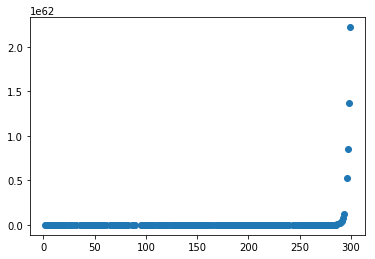

In [365]:
plt.clf
plt.scatter(X_train_recovered, y_train_recovered)
plt.show

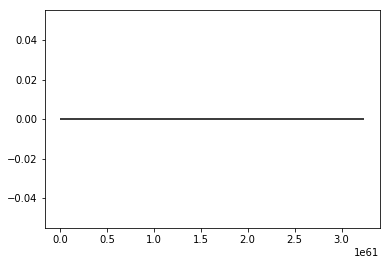

In [366]:
plt.scatter(y_test_recovered,  predictions_recovered - np.concatenate(y_test_recovered, axis=0))
plt.hlines(y=0, xmin=y_test_recovered.min(), xmax=y_test_recovered.max())
plt.show()

In [367]:
predictions, y_test_recovered


(array([-0.13488732, -0.1339867 , -0.11696483, -0.13200246, -0.13436775,
         0.78797305, -0.12440021, -0.15917681, -0.12254052, -0.12879227,
        -0.13577758, -0.13065098, -0.13797961, -0.16873918, -0.16271843,
        -0.15120737, -0.1671807 , -0.13707344, -0.14738391, -0.13629572,
        -0.13430147, -0.12794779, -0.1192769 , -0.12271126, -0.12727119,
        -0.16105153, -0.16947536, -0.16539596, -0.1375268 , -0.12017597,
        -0.12118883, -0.13843356, -0.1303132 , -0.1274407 , -0.11561356,
        -0.12625708, -0.16262643, -0.11341669, -0.13081901, -0.11493813,
        -0.13791536, -0.137785  , -0.15626027, -0.11764102, -0.13723989,
        -0.12980641, -0.11797996, -0.12777932, -0.13558336, -0.12287925,
        -0.12946893,  1.490011  , -0.11713435, -0.13402976, -0.13817374,
        -0.11223443, -0.13335739, -0.11629023, -0.15852366, -0.13284753,
        -0.1352595 , -0.12760939, -0.14134572, -0.11443065, -0.11612032,
        -0.11780994, -0.13267805, -0.1252438 , -0.1

In [343]:
X_train.tail(10)

,X
251,252
282,283
40,41
118,119
162,163
71,72
278,279
218,219
223,224
271,272


In [349]:
y_test, y_test_recovered

(               Y4
 210  9.034300e+43
 217  2.623060e+45
 28   8.320400e+05
 117  3.311650e+24
 131  2.791720e+27
 293  2.003870e+61
 72   1.304970e+15
 238  6.420200e+49
 61   6.557470e+12
 98   3.542250e+20
 197  1.734030e+41
 109  7.049250e+22
 163  1.359800e+34
 250  2.067280e+52
 242  4.400470e+50
 275  3.468100e+57
 247  4.880200e+51
 177  1.146310e+37
 277  9.079600e+57
 189  3.691090e+39
 215  1.001920e+45
 93   3.194040e+19
 287  1.116720e+60
 62   1.061020e+13
 89   4.660050e+18
 240  1.680830e+50
 261  4.114000e+54
 245  1.864070e+51
 170  3.948110e+35
 47   7.778742e+09
 ..            ...
 104  6.356310e+21
 34   1.493035e+07
 92   1.974030e+19
 200  7.345450e+41
 63   1.716770e+13
 102  2.427890e+21
 294  3.242320e+61
 29   1.346269e+06
 129  1.066340e+27
 160  3.210060e+33
 0    1.000000e+00
 221  1.797870e+46
 24   1.213930e+05
 270  3.127180e+56
 122  3.672670e+25
 205  8.146230e+42
 91   1.220020e+19
 281  6.223250e+58
 13   6.100000e+02
 23   7.502500e+04
 33   9.2274

In [345]:
out_df=pd.DataFrame()
out_df["X"] = np.concatenate(X_test_recovered, axis=0)
out_df["Y"] = np.concatenate(y_test_recovered, axis=0)
out_df["Predictions"] = predictions_recovered
out_df.head()

,X,Y,Predictions
0,211.0,0.000000e+00,-5.344511e+59
1,218.0,2.497683e+45,-4.017455e+59
2,29.0,0.000000e+00,-2.768379e+59
3,118.0,0.000000e+00,-4.471509e+59
4,132.0,0.000000e+00,-4.803544e+59


In [346]:
out_df.to_csv("data/predicting_series_out.csv")

In [347]:
predictions

array([-0.15578599, -0.14863815, -0.14191033, -0.15108379, -0.15287221,
        1.87520882, -0.14545098, -0.1038703 , -0.14566616, -0.14649231,
       -0.15907927, -0.14898497, -0.15267983,  0.00717626, -0.08314583,
        1.13928886, -0.03986882, -0.15506283,  1.23845421, -0.15743769,
       -0.15075816, -0.14578547,  1.69137857, -0.14566493, -0.14538686,
       -0.09387092,  0.44502837, -0.06135702, -0.15359441, -0.14501228,
       -0.14553567, -0.15272123, -0.14847591, -0.14549563, -0.14078027,
       -0.14553574,  0.74108252, -0.13724324, -0.14925661, -0.13975609,
       -0.15262922, -0.15289403, -0.11099973, -0.14223806, -0.15330048,
       -0.14781239, -0.14259986, -0.14568323, -0.15846529, -0.14566901,
       -0.14738794,  1.90212934, -0.14198352, -0.15278101, -0.15278115,
       -0.13535527, -0.14379218, -0.14148816,  0.89062533, -0.15244297,
       -0.15771459, -0.145581  ,  1.43317532, -0.13891073, -0.14130137,
       -0.14235158, -0.15216434, -0.14572334, -0.13931657, -0.14